## **SHAPEAI - DATA SCIENTIST TRAINING & INTERNSHIP**

## **Author : Midhir Nambiar**

## **Task : KMeans Clustering**

Outline: 

1. Importing libraries & dataset
2. Data Analysis
3. Data Visualization
4. Label Encoding
5. Model Building & Prediction
6. Model Evaluation

**Importing Libraries & dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data Analysis**

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The average age of the customer is 38, customers between the age of 18-70 visit the mall quite often, customers have an average annual income of 60k$

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We have no null values in our dataset, Gender column is of type object which needs to be taken care of.

**Data Visualization**

<Axes: xlabel='Age', ylabel='count'>

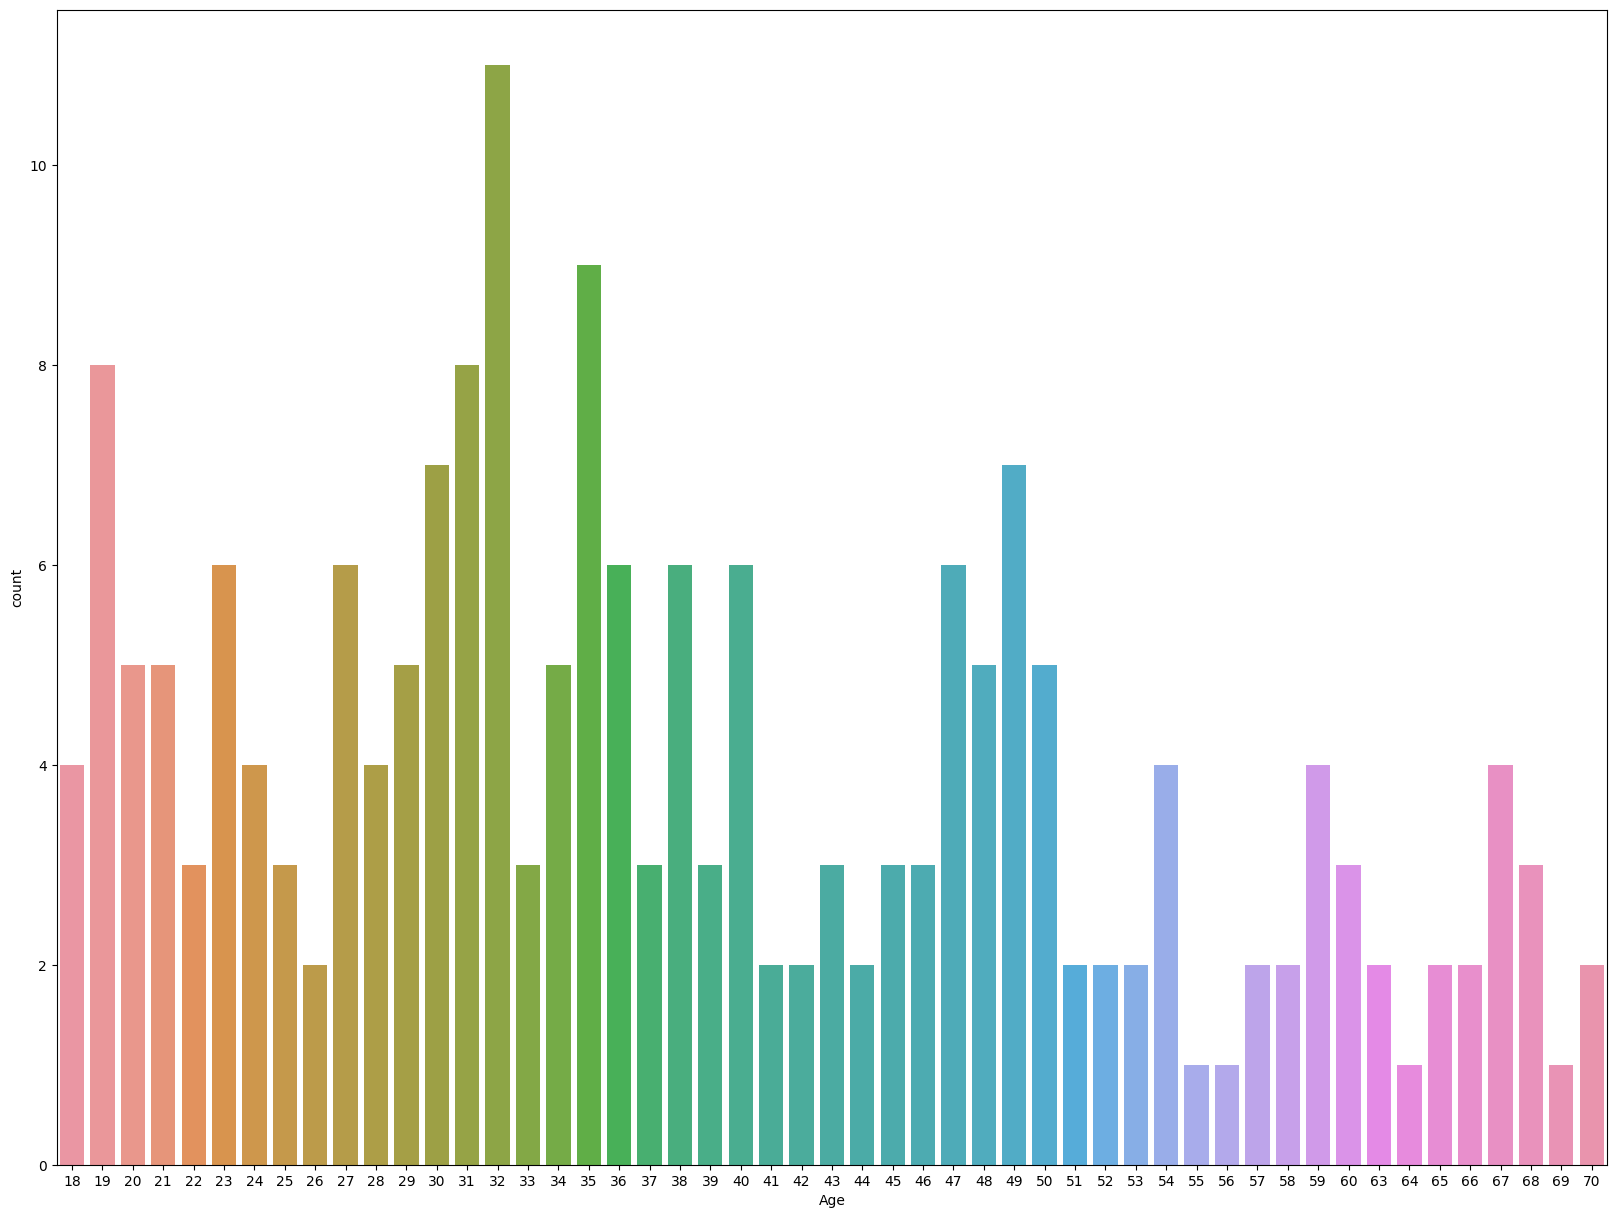

In [7]:
# Age wise distribution
plt.figure(figsize=(20,15))
sns.countplot(data=df,x='Age')

People between the age group of 30-36 visited the mall more often.

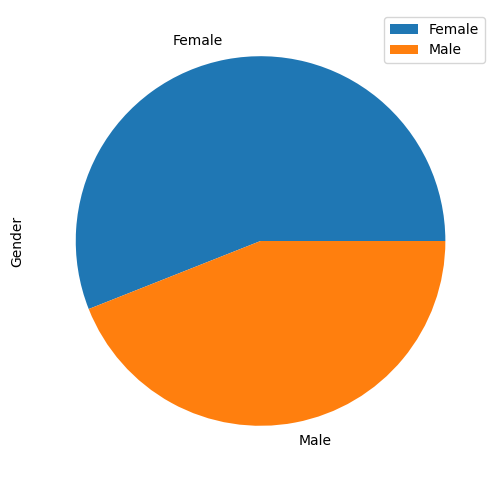

In [17]:
# Genderwise distribution
plt.figure(figsize=(6,6))
df.Gender.value_counts().plot(kind='pie')
plt.legend()
plt.show()

Females tend to visit the mall quite often

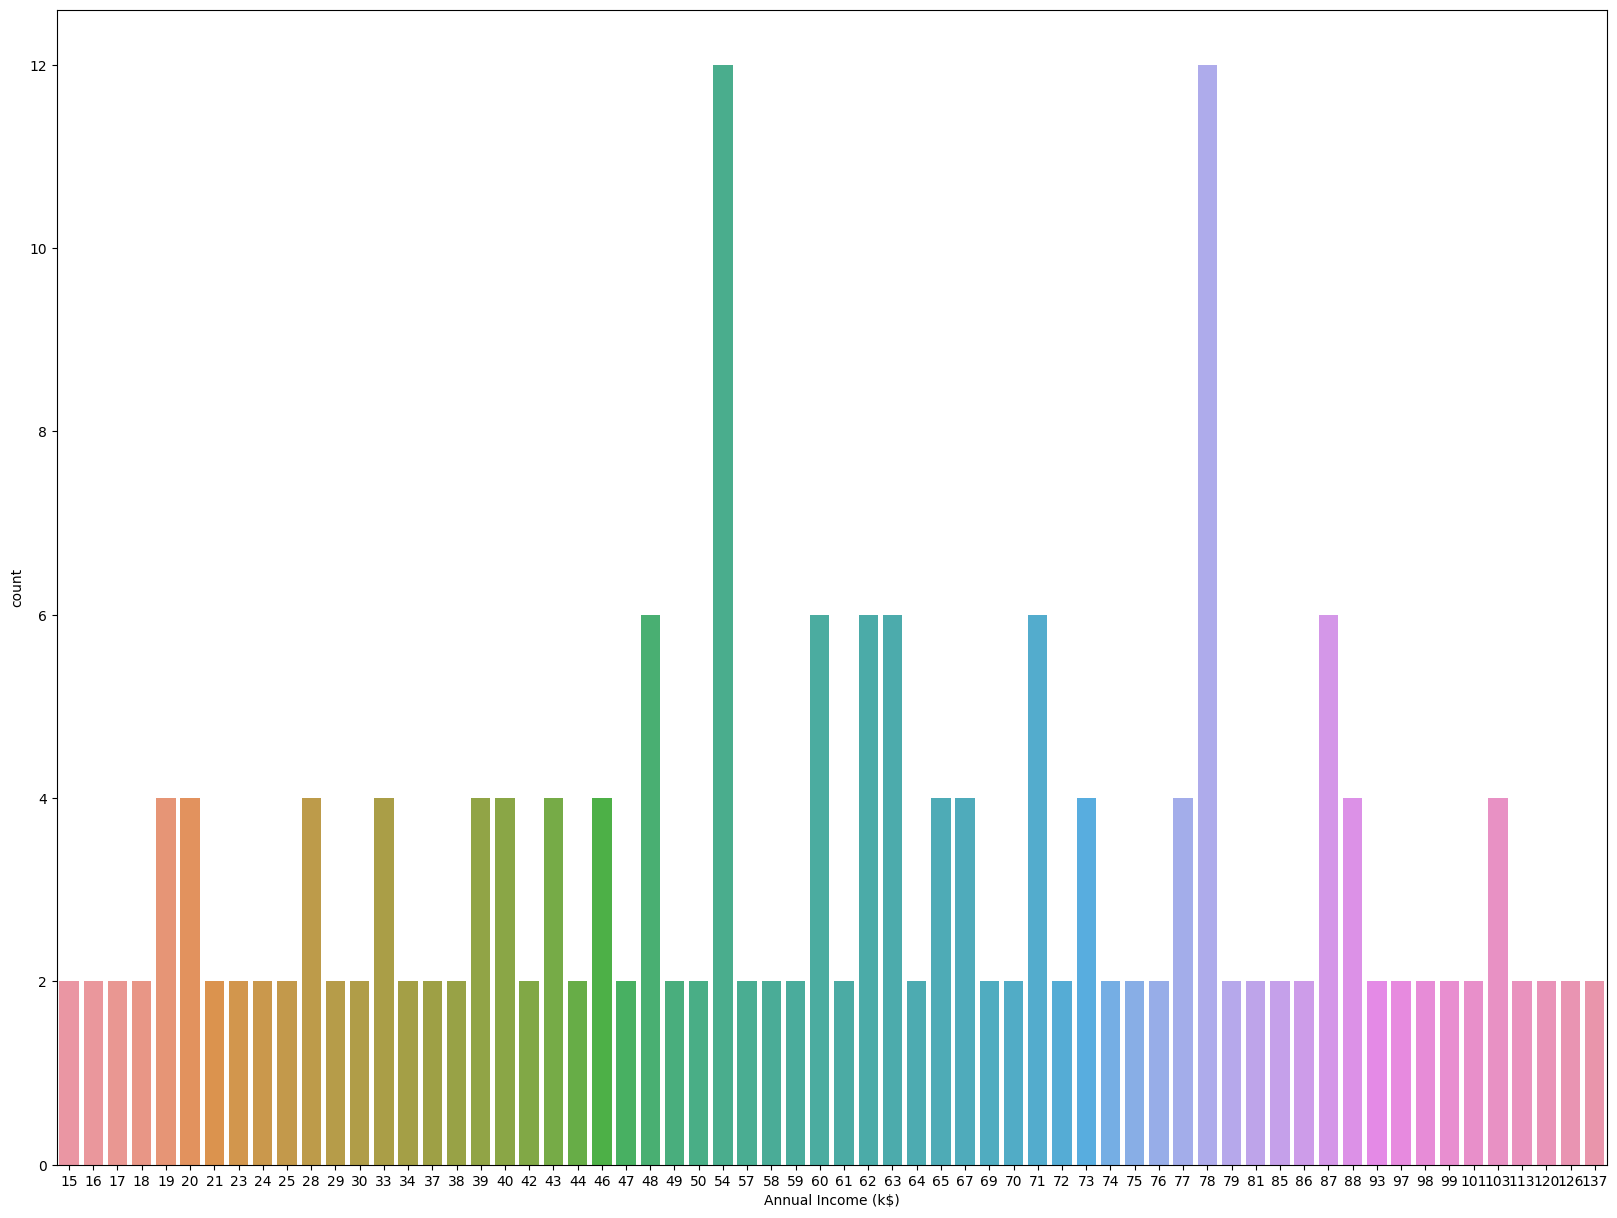

In [18]:
# Distribution of Annual Income 
plt.figure(figsize=(20,15))
sns.countplot(data=df,x='Annual Income (k$)')
plt.show()

Customers having the annual income of 54 and 78 k$ visit the mall often

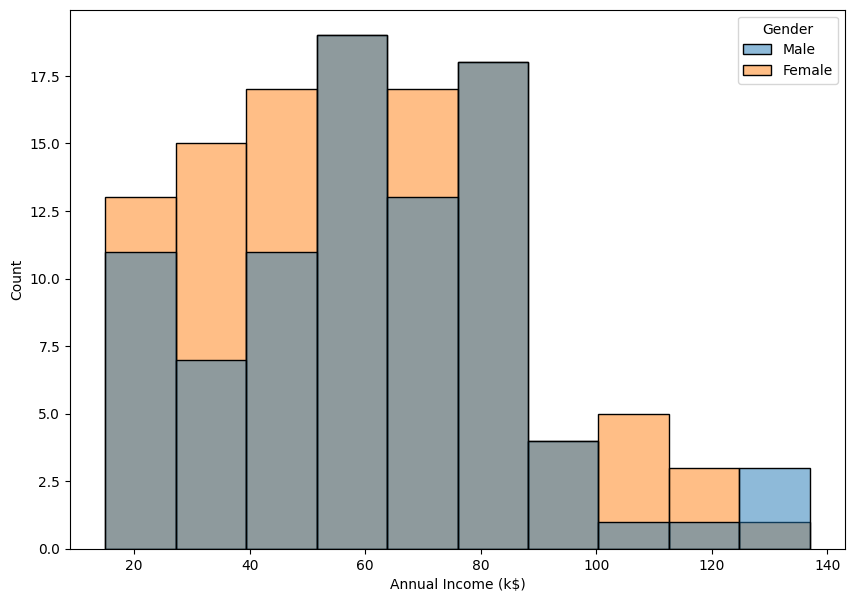

In [24]:
# Distribution of Annual Income with respect to Gender
plt.figure(figsize=(10,7))
sns.histplot(df,x='Annual Income (k$)',hue='Gender')
plt.show()

As we can see from above, there are a lot of females having an annual income in the range of 10k to 120k and all the customers above that are males having a annual income between 120 to 140k.

**Label Encoding**

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
enc = LabelEncoder()

In [27]:
df.Gender = enc.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [29]:
# Dropping CustomerID since it is not related to Annual Income
df.drop('CustomerID',axis=1,inplace=True)

**Model Building & Prediction**

In [32]:
lst = []
for i in range(1,11):
  kmodel = KMeans(n_clusters=i,n_init=15,max_iter=500)
  kmodel.fit(df)
  lst.append(kmodel.inertia_)

In [33]:
# WCSS(Within cluster sum of squares) value
lst

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58348.641363315044,
 51132.703212576904,
 44357.32664902663,
 40811.455768566826,
 37256.71946084512]

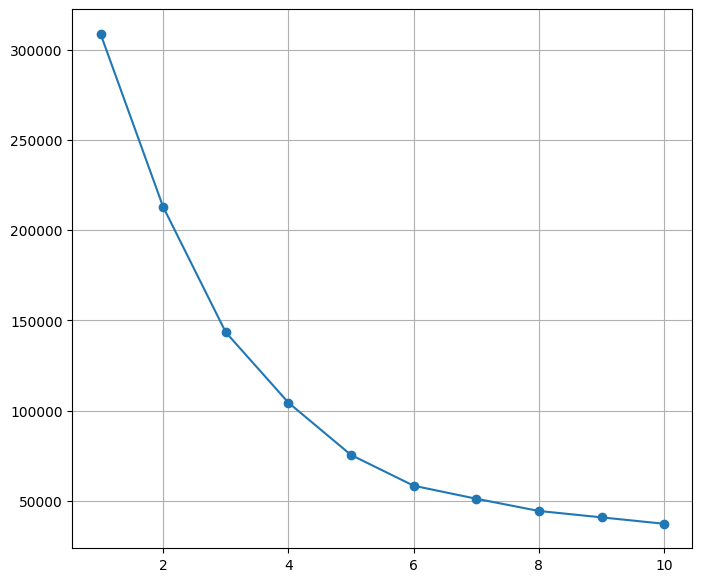

In [40]:
# Elbow method - plot between wcss distance and the values of k 
plt.figure(figsize=(8,7))
plt.plot(range(1,11),lst,marker='o')
plt.grid()
plt.show()

The elbow curve sharply bends at K = 6

In [41]:
kmodel = KMeans(n_clusters=6)

In [42]:
# Model fit
kmodel.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [43]:
prediction = kmodel.predict(df)

In [45]:
# Cluster centroids
kmodel.cluster_centers_

array([[ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952]])

In [46]:
df['Cluster'] = prediction

In [47]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,5
1,1,21,15,81,3
2,0,20,16,6,5
3,0,23,16,77,3
4,0,31,17,40,5


**Model Evaluation**

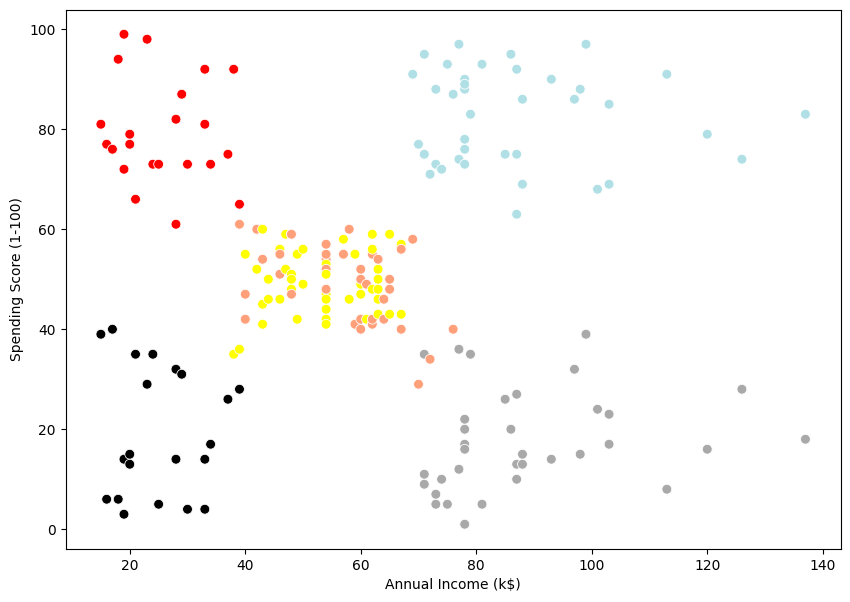

In [54]:
plt.figure(figsize=(10,7))
color =np.array(['darkgray','lightsalmon','powderblue','red','yellow','black'])
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=color[kmodel.labels_],s=50)
plt.show()

We can see that most of the customers who have a lower annual income have a higher spending score, while customers having a higher annual income tend to minimise their expenses.

## **THANK YOU**